In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# relacion masa fuerza
## campeonato del mundo de halterofilia

### 2003   

In [52]:
year = "2003"
output_dir = "/tmp/halterofilia/" + year
my_url = "https://es.wikipedia.org/wiki/Campeonato_Mundial_de_Halterofilia_de_" + year
!wikitablescrape --url={my_url}  --output-folder={output_dir}

Parsing all tables from 'https://es.wikipedia.org/wiki/Campeonato_Mundial_de_Halterofilia_de_2003' into '/tmp/halterofilia/2003'
Writing table 1 to /tmp/halterofilia/2003/table_1_medallistas_masculino.csv
Writing table 2 to /tmp/halterofilia/2003/table_2_medallistas_femenino.csv
Writing table 3 to /tmp/halterofilia/2003/table_3_medallero_femenino.csv


In [53]:
input_file =  "/tmp/halterofilia/2003/table_1_medallistas_masculino.csv"
male_df = pd.read_csv(input_file)
cols = ["body_mass", "gold", "silver", "bronce"]
male_df.columns = cols
male_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body_mass  8 non-null      object
 1   gold       8 non-null      object
 2   silver     8 non-null      object
 3   bronce     8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [54]:
display(male_df)

,body_mass,gold,silver,bronce
0,56 kg,"Wu Meijin China China 127,5 + 160,0 = 287,5​","Adrian Jigău Rumania Rumania 125,0 + 155,0 = 2...","Sedat Artuç Turquía Turquía 125,0 + 152,5 = 27..."
1,62 kg,"Halil Mutlu Turquía Turquía 147,5 + 175,0 = 322,5","Shi Zhiyong China China 147,5 + 170,0 = 317,5","Le Maosheng China China 135,0 + 170,0 = 305,0"
2,69 kg,"Zhang Guozheng China China 152,5 + 192,5 = 345,0","Lee Bae-Young Corea del Sur Corea del Sur 150,...","Turan Mirzəyev Azerbaiyán Azerbaiyán 147,5 + 1..."
3,77 kg,"Falahati Mohamad Neyad Irán Irán 155,0 + 202,5...","Reyhan Arabacıoğlu Turquía Turquía 160,0 + 195...","Li Hongli China China 162,5 + 190,0 = 352,5"
4,85 kg,"Valeriu Calancea Rumania Rumania 167,5 + 215,0...","Yuan Aijun China China 170,0 + 212,5 = 382,5","Sergo Chakhoyan Australia 172,5 + 205,0 = 377,5"
5,94 kg,"Milen Dobrev Bulgaria Bulgaria 185,0 + 220,0 =...","Hakan Yılmaz Turquía Turquía 180,0 + 220,0 = 4...","Vadim Vacarciuc Moldavia Moldavia 177,5 + 222,..."
6,105 kg,"Said Saif Asaad Catar Catar 195,0 + 227,5 = 422,5","Roldan A Sanchez Colombia Colombia 195,0 + 222...","Bünyami Sudaş Turquía Turquía 185,0 + 230,0 = ..."
7,+105 kg,"Hosein Rezazadeh Irán Irán 207,5 + 250,0 = 457,5","Velichko Cholakov Bulgaria Bulgaria 205,0 + 24...","Viktors Ščerbatihs Letonia Letonia 200,0 + 245..."


There is too much info, just get the weights

In [55]:
male_df.iloc[:,0] = male_df.iloc[:,0].str.replace("kg", "", regex=True)
for i in male_df.columns[1:]:
    male_df.loc[:,i] = male_df.loc[:,i].str.replace("([^\d\W]+)", "", regex=True)     # del most of non desired chars, also the kgs in the first col
    male_df.loc[:,i] = male_df.loc[:,i].str.replace("([^\d\,\+\=]+)", "", regex=True) # del other symbols like -
    male_df.loc[:,i] = male_df.loc[:,i].str.replace("\,", ".", regex=True) # replace , by .
male_df

,body_mass,gold,silver,bronce
0,56,127.5+160.0=287.5,125.0+155.0=280.0,125.0+152.5=277.5
1,62,147.5+175.0=322.5,147.5+170.0=317.5,135.0+170.0=305.0
2,69,152.5+192.5=345.0,150.0+190.0=340.0,147.5+180.0=327.5
3,77,155.0+202.5=357.5,160.0+195.0=355.0,162.5+190.0=352.5
4,85,167.5+215.0=382.5,170.0+212.5=382.5,172.5+205.0=377.5
5,94,185.0+220.0=405.0,180.0+220.0=400.0,177.5+222.5=400.0
6,105,195.0+227.5=422.5,195.0+222.5=417.5,185.0+230.0=415.0
7,+105,207.5+250.0=457.5,205.0+242.5=447.5,200.0+245.0=445.0


Now get the weight for two modalities: snatch, clean and jerk

In [56]:
for i in male_df.columns[1:]:
    print(i)
    male_df.loc[:, i] = male_df.loc[:,i].str.split('=').str[0] 
#
for i in male_df.columns[1:].copy():
    print(i) 
    newcol1 = i+"_snatch"
    newcol2 = i+"_clean_and_jerk"
    male_df.loc[:, newcol1] = male_df.loc[:,i].str.split('+').str[0] # get it
    male_df.loc[:, newcol2] = male_df.loc[:,i].str.split('+').str[1] # get 
    male_df = male_df.drop(i, axis=1)
male_df = male_df.drop(index=male_df.index[-1])

#male_df.iloc[:,:].apply(pd.to_numeric)
print(male_df.info())
male_df

gold
silver
bronce
gold
silver
bronce
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   body_mass              7 non-null      object
 1   gold_snatch            7 non-null      object
 2   gold_clean_and_jerk    7 non-null      object
 3   silver_snatch          7 non-null      object
 4   silver_clean_and_jerk  7 non-null      object
 5   bronce_snatch          7 non-null      object
 6   bronce_clean_and_jerk  7 non-null      object
dtypes: object(7)
memory usage: 520.0+ bytes
None


,body_mass,gold_snatch,gold_clean_and_jerk,silver_snatch,silver_clean_and_jerk,bronce_snatch,bronce_clean_and_jerk
0,56,127.5,160.0,125.0,155.0,125.0,152.5
1,62,147.5,175.0,147.5,170.0,135.0,170.0
2,69,152.5,192.5,150.0,190.0,147.5,180.0
3,77,155.0,202.5,160.0,195.0,162.5,190.0
4,85,167.5,215.0,170.0,212.5,172.5,205.0
5,94,185.0,220.0,180.0,220.0,177.5,222.5
6,105,195.0,227.5,195.0,222.5,185.0,230.0


In [57]:
for i in male_df.columns:
    print(i) 
    male_df[i] = pd.to_numeric(male_df[i])
print(male_df.info())
male_df

body_mass
gold_snatch
gold_clean_and_jerk
silver_snatch
silver_clean_and_jerk
bronce_snatch
bronce_clean_and_jerk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   body_mass              7 non-null      int64  
 1   gold_snatch            7 non-null      float64
 2   gold_clean_and_jerk    7 non-null      float64
 3   silver_snatch          7 non-null      float64
 4   silver_clean_and_jerk  7 non-null      float64
 5   bronce_snatch          7 non-null      float64
 6   bronce_clean_and_jerk  7 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 520.0 bytes
None


,body_mass,gold_snatch,gold_clean_and_jerk,silver_snatch,silver_clean_and_jerk,bronce_snatch,bronce_clean_and_jerk
0,56,127.5,160.0,125.0,155.0,125.0,152.5
1,62,147.5,175.0,147.5,170.0,135.0,170.0
2,69,152.5,192.5,150.0,190.0,147.5,180.0
3,77,155.0,202.5,160.0,195.0,162.5,190.0
4,85,167.5,215.0,170.0,212.5,172.5,205.0
5,94,185.0,220.0,180.0,220.0,177.5,222.5
6,105,195.0,227.5,195.0,222.5,185.0,230.0


## Show the results

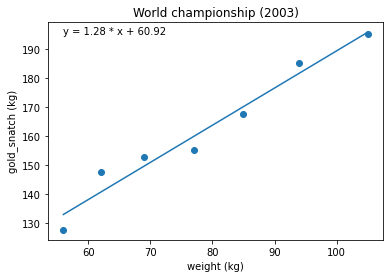

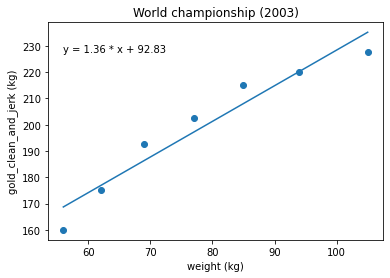

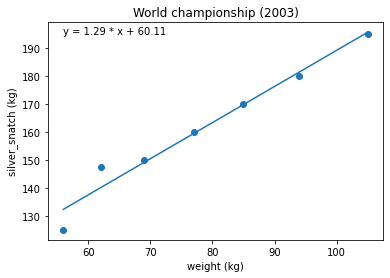

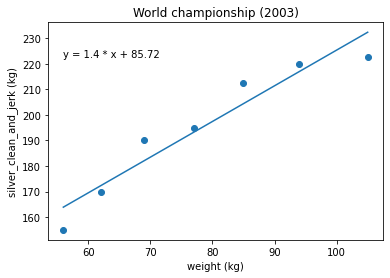

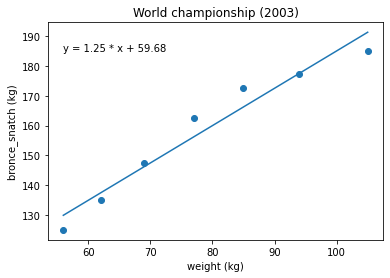

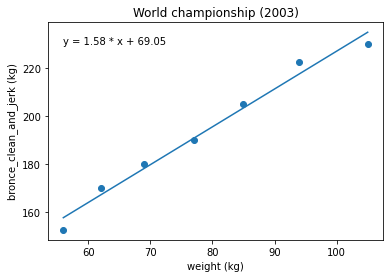

In [58]:
x = male_df.body_mass
for i, col in enumerate(male_df.columns[1:]):
    y = male_df[col]
    slope, intercept = np.polyfit(x, y, 1)
    text = "y = " + str(round(slope, 2)) + " * x + " + str(round(intercept, 2)) 
    #print(text)
    plt.scatter(x, y)
    plt.title("World championship " + "(" + str(year) + ")")
    plt.ylabel(col + " (kg)")
    plt.xlabel("weight (kg)")
    plt.plot(x, (slope*x)+intercept)
    plt.text(min(x), max(y), text, dict(size=10))
    plt.show()

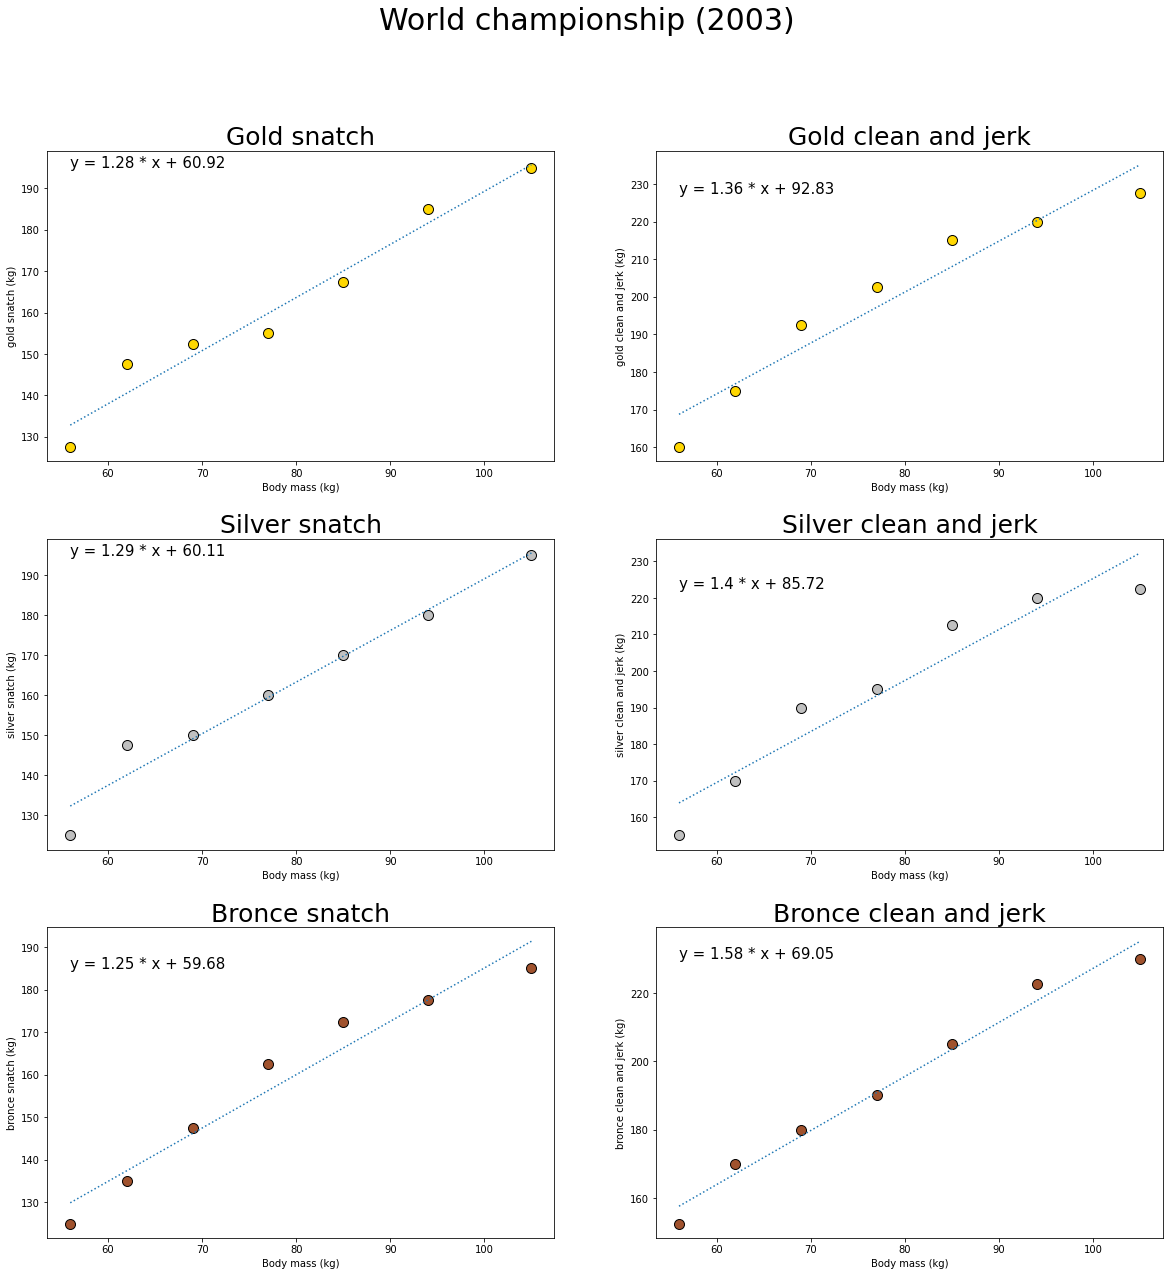

In [108]:
ROWS = 3; COLS = 2
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 20))
x = male_df.body_mass
my_colors = ['gold', 'silver', 'sienna']
for i, col in enumerate(male_df.columns[1:]):
    r = i//COLS; c = i%COLS
    #print(r, c, col); continue
    y = male_df[col]
    slope, intercept = np.polyfit(x, y, 1)
    text = "y = " + str(round(slope, 2)) + " * x + " + str(round(intercept, 2)) 
    
    ax[r,c].plot(x, (slope*x)+intercept, linestyle='dotted')
    ax[r,c].scatter(x, y, facecolors=my_colors[r], edgecolors='black', s=100)
    ax[r,c].set_title(col.replace("_", " ").capitalize(), fontsize=25)
    ax[r,c].set_ylabel(col.replace("_", " ") + " (kg)")
    ax[r,c].set_xlabel("Body mass (kg)")
    ax[r,c].text(min(x), max(y), text, dict(size=15))
fig.subplots_adjust(hspace=0.25, wspace=0.2)
fig.suptitle("World championship " + "(" + str(year) + ")", fontsize=30)
plt.show()